In [1]:
#Importing needed packages and Dataset
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
import sklearn


#Ignoring Warnings
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
#naming our Dataset
df = pd.read_csv('H2HBABBA2741.csv')

df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0100031704,DELHAIZE trust,2019-04-08 00:00:00,2019.0,1.928723e+09,2019-02-02,20190201,20190202,20190408.0,USD,RV,1.0,NaN,12026.31,20190202.0,NAGD,1.928723e+09,0
1,U001,0200769623,WAL-MAR systems,2020-03-02 00:00:00,2020.0,1.930549e+09,2020-02-20,20200220,20200220,20200306.0,USD,RV,1.0,NaN,4272.16,20200220.0,NAH4,1.930549e+09,0
2,U001,0200744019,TARG systems,2019-02-12 00:00:00,2019.0,1.928657e+09,2019-01-23,20190121,20190123,20190207.0,USD,RV,1.0,NaN,7664.54,20190123.0,NAA8,1.928657e+09,0
3,CA02,0140105847,GORDON F trust,2019-11-18 00:00:00,2019.0,2.960591e+09,2019-11-05,20191105,20191105,20191117.0,CAD,RV,1.0,NaN,889.96,20191107.0,CA10,2.960591e+09,0
4,U001,0200769623,WAL-MAR co,2019-07-11 00:00:00,2019.0,1.929531e+09,2019-06-23,20190623,20190623,20190708.0,USD,RV,1.0,NaN,9394.64,20190623.0,NAH4,1.929531e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,CA02,0140104440,SO trust,NaN,2020.0,2.960623e+09,2020-03-21,20200321,20200321,20200405.0,CAD,RV,1.0,NaN,173220.95,20200326.0,CA10,2.960623e+09,1
49996,U001,0200435191,C& associates,2019-01-15 00:00:00,2019.0,1.928540e+09,2019-01-05,20181229,20190105,20190120.0,USD,RV,1.0,NaN,11008.63,20190105.0,NAC6,1.928540e+09,0
49997,U001,0200762301,C&S WH foundation,NaN,2020.0,1.930583e+09,2020-03-02,20200229,20200302,20200506.0,USD,RV,1.0,NaN,2973.00,20200302.0,NAGD,1.930583e+09,1
49998,U001,0200769623,WAL-MAR in,NaN,2020.0,1.930815e+09,2020-04-28,20200422,20200428,20200513.0,USD,RV,1.0,NaN,6361.07,20200428.0,NAH4,1.930815e+09,1


In [2]:
df.dtypes

business_code              object
cust_number                object
name_customer              object
clear_date                 object
buisness_year             float64
doc_id                    float64
posting_date               object
document_create_date        int64
document_create_date.1      int64
due_in_date               float64
invoice_currency           object
document type              object
posting_id                float64
area_business             float64
total_open_amount         float64
baseline_create_date      float64
cust_payment_terms         object
invoice_id                float64
isOpen                      int64
dtype: object

In [3]:
#Converting type
df.dropna(axis=0,how='any', subset=['doc_id'],inplace=True)
df['buisness_year']=df['buisness_year'].astype('int64')
df['doc_id']=df['doc_id'].astype('int64')

# Data Preprocessing 

## Null Imputation

In [4]:

df.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    5
isOpen                        0
dtype: int64

In [5]:
#Knowing Unique Columns
df.nunique()

business_code                 6
cust_number                1406
name_customer              4200
clear_date                  393
buisness_year                 2
doc_id                    48814
posting_date                501
document_create_date        507
document_create_date.1      501
due_in_date                 551
invoice_currency              2
document type                 2
posting_id                    1
area_business                 0
total_open_amount         44285
baseline_create_date        507
cust_payment_terms           75
invoice_id                48809
isOpen                        2
dtype: int64

In [6]:
#Droping Duplicate Rows
df.drop_duplicates(keep = False,inplace = True)


## Date Time Conversion

In [7]:

df['clear_date'] = pd.to_datetime(df['clear_date'])
df['document_create_date.1'] = pd.to_datetime(df['document_create_date.1'], format='%Y%m%d')
df['due_in_date'] = pd.to_datetime(df['due_in_date'], format='%Y%m%d')
df['posting_date'] = pd.to_datetime(df['posting_date'])


df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0100031704,DELHAIZE trust,2019-04-08,2019,1928723037,2019-02-02,20190201,2019-02-02,2019-04-08,USD,RV,1.0,NaN,12026.31,20190202.0,NAGD,1.928723e+09,0
1,U001,0200769623,WAL-MAR systems,2020-03-02,2020,1930549023,2020-02-20,20200220,2020-02-20,2020-03-06,USD,RV,1.0,NaN,4272.16,20200220.0,NAH4,1.930549e+09,0
2,U001,0200744019,TARG systems,2019-02-12,2019,1928657130,2019-01-23,20190121,2019-01-23,2019-02-07,USD,RV,1.0,NaN,7664.54,20190123.0,NAA8,1.928657e+09,0
4,U001,0200769623,WAL-MAR co,2019-07-11,2019,1929531397,2019-06-23,20190623,2019-06-23,2019-07-08,USD,RV,1.0,NaN,9394.64,20190623.0,NAH4,1.929531e+09,0
5,U001,0100043933,TAPA co,2019-11-07,2019,1930072604,2019-11-07,20191104,2019-11-07,2019-11-22,USD,RV,1.0,NaN,49885.92,20191107.0,NAA8,1.930073e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,0200794332,COST,NaT,2020,1930810054,2020-04-22,20200421,2020-04-22,2020-05-07,USD,RV,1.0,NaN,83287.40,20200422.0,NAAX,1.930810e+09,1
49996,U001,0200435191,C& associates,2019-01-15,2019,1928539731,2019-01-05,20181229,2019-01-05,2019-01-20,USD,RV,1.0,NaN,11008.63,20190105.0,NAC6,1.928540e+09,0
49997,U001,0200762301,C&S WH foundation,NaT,2020,1930583185,2020-03-02,20200229,2020-03-02,2020-05-06,USD,RV,1.0,NaN,2973.00,20200302.0,NAGD,1.930583e+09,1
49998,U001,0200769623,WAL-MAR in,NaT,2020,1930815172,2020-04-28,20200422,2020-04-28,2020-05-13,USD,RV,1.0,NaN,6361.07,20200428.0,NAH4,1.930815e+09,1


In [8]:
#Creating Target whinch is Delay in our PDP
df['delay'] = df['clear_date'] - df['due_in_date']

In [9]:
df.dtypes

business_code                      object
cust_number                        object
name_customer                      object
clear_date                 datetime64[ns]
buisness_year                       int64
doc_id                              int64
posting_date               datetime64[ns]
document_create_date                int64
document_create_date.1     datetime64[ns]
due_in_date                datetime64[ns]
invoice_currency                   object
document type                      object
posting_id                        float64
area_business                     float64
total_open_amount                 float64
baseline_create_date              float64
cust_payment_terms                 object
invoice_id                        float64
isOpen                              int64
delay                     timedelta64[ns]
dtype: object

In [10]:
#Droping Unnecessary Columns  
df.drop(['area_business'],axis = 1,inplace = True)
df.drop(['posting_id'],axis = 1,inplace = True)
df.drop(['document_create_date'],axis = 1,inplace = True)
df.drop(['baseline_create_date'],axis = 1,inplace = True)
df.drop(['invoice_id'],axis = 1,inplace = True)

df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,cust_payment_terms,isOpen,delay
0,U001,0100031704,DELHAIZE trust,2019-04-08,2019,1928723037,2019-02-02,2019-02-02,2019-04-08,USD,RV,12026.31,NAGD,0,0 days
1,U001,0200769623,WAL-MAR systems,2020-03-02,2020,1930549023,2020-02-20,2020-02-20,2020-03-06,USD,RV,4272.16,NAH4,0,-4 days
2,U001,0200744019,TARG systems,2019-02-12,2019,1928657130,2019-01-23,2019-01-23,2019-02-07,USD,RV,7664.54,NAA8,0,5 days
4,U001,0200769623,WAL-MAR co,2019-07-11,2019,1929531397,2019-06-23,2019-06-23,2019-07-08,USD,RV,9394.64,NAH4,0,3 days
5,U001,0100043933,TAPA co,2019-11-07,2019,1930072604,2019-11-07,2019-11-07,2019-11-22,USD,RV,49885.92,NAA8,0,-15 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,0200794332,COST,NaT,2020,1930810054,2020-04-22,2020-04-22,2020-05-07,USD,RV,83287.40,NAAX,1,NaT
49996,U001,0200435191,C& associates,2019-01-15,2019,1928539731,2019-01-05,2019-01-05,2019-01-20,USD,RV,11008.63,NAC6,0,-5 days
49997,U001,0200762301,C&S WH foundation,NaT,2020,1930583185,2020-03-02,2020-03-02,2020-05-06,USD,RV,2973.00,NAGD,1,NaT
49998,U001,0200769623,WAL-MAR in,NaT,2020,1930815172,2020-04-28,2020-04-28,2020-05-13,USD,RV,6361.07,NAH4,1,NaT


In [11]:
#Sorting According to posting_date and resetting Index 
df.sort_values(['posting_date'], ascending=True,inplace=True)
df.reset_index(inplace=True, drop=True)

df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,cust_payment_terms,isOpen,delay
0,U001,0200769623,WAL-MAR in,2019-01-11,2019,1928542955,2018-12-30,2018-12-30,2019-01-14,USD,RV,35229.19,NAH4,0,-3 days
1,U001,0200769623,WAL-MAR us,2019-01-11,2019,1928544626,2018-12-30,2018-12-30,2019-01-14,USD,RV,36619.36,NAH4,0,-3 days
2,U001,0200769623,WAL-MAR us,2019-01-11,2019,1928543313,2018-12-30,2018-12-30,2019-01-14,USD,RV,13065.20,NAH4,0,-3 days
3,U001,0200759878,SA corp,2019-01-15,2019,1928540412,2018-12-30,2018-12-30,2019-01-14,USD,RV,37847.65,NAH4,0,1 days
4,U001,0200769623,WAL-MAR llc,2019-01-10,2019,1928543977,2018-12-30,2018-12-30,2019-01-14,USD,RV,61989.53,NAH4,0,-4 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47647,U001,0200457993,SHAM co,NaT,2020,1930901756,2020-05-15,2020-05-15,2020-05-30,USD,RV,19798.67,NAA8,1,NaT
47648,U001,0200742344,MAINES systems,NaT,2020,1930914868,2020-05-18,2020-05-18,2020-06-02,USD,RV,20756.50,NAA8,1,NaT
47649,U001,0200765011,MAINES corp,NaT,2020,1930917883,2020-05-19,2020-05-19,2020-06-03,USD,RV,27984.87,NAA8,1,NaT
47650,U001,200956366,RICH systems,NaT,2020,1930910384,2020-05-21,2020-05-21,2020-06-05,USD,RV,42360.00,NAA8,1,NaT


# Removing the datapoints where the target value is null

In [12]:

main_train = df[df.delay.isnull()==False]
main_test = df[df.delay.isnull()]

In [13]:
main_train

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,cust_payment_terms,isOpen,delay
0,U001,0200769623,WAL-MAR in,2019-01-11,2019,1928542955,2018-12-30,2018-12-30,2019-01-14,USD,RV,35229.19,NAH4,0,-3 days
1,U001,0200769623,WAL-MAR us,2019-01-11,2019,1928544626,2018-12-30,2018-12-30,2019-01-14,USD,RV,36619.36,NAH4,0,-3 days
2,U001,0200769623,WAL-MAR us,2019-01-11,2019,1928543313,2018-12-30,2018-12-30,2019-01-14,USD,RV,13065.20,NAH4,0,-3 days
3,U001,0200759878,SA corp,2019-01-15,2019,1928540412,2018-12-30,2018-12-30,2019-01-14,USD,RV,37847.65,NAH4,0,1 days
4,U001,0200769623,WAL-MAR llc,2019-01-10,2019,1928543977,2018-12-30,2018-12-30,2019-01-14,USD,RV,61989.53,NAH4,0,-4 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38260,U001,0200720419,THUR,2020-03-12,2020,1930561410,2020-02-26,2020-02-26,2020-03-12,USD,RV,55850.62,NAA8,0,0 days
38272,U001,0200357714,US foundation,2020-03-13,2020,1930580620,2020-02-27,2020-02-27,2020-03-13,USD,RV,13783.54,NAA8,0,0 days
38355,CA02,0140106408,WAL-M corporation,2020-03-20,2020,2960616886,2020-02-27,2020-02-27,2020-03-09,CAD,RV,20348.01,CA10,0,11 days
38372,U001,0200759878,SA systems,2020-03-13,2020,1930573748,2020-02-27,2020-02-27,2020-03-13,USD,RV,63966.18,NAH4,0,0 days


In [14]:
for col in main_train.columns:
    if main_train[col].nunique()<= 15:
        print(main_train[col].value_counts())
        print('#########################')

U001    34584
CA02     3023
U013      528
U002      117
U005       11
U007        2
Name: business_code, dtype: int64
#########################
2019    33199
2020     5066
Name: buisness_year, dtype: int64
#########################
USD    35242
CAD     3023
Name: invoice_currency, dtype: int64
#########################
RV    38260
X2        5
Name: document type, dtype: int64
#########################
0    38265
Name: isOpen, dtype: int64
#########################


In [15]:
#clubbing
df=pd.DataFrame(main_train['cust_payment_terms'].value_counts())
cpt=np.array(df.loc[df['cust_payment_terms']<15].index)
cpt

array(['NA3F', 'NAUP', 'BR56', 'NA84', 'C106', 'NA9X', 'CAB1', 'NAVD',
       'NAM3', 'NA8Q', 'NA25', 'B052', 'NATM', '90M7', 'NA31', 'NACE',
       'NANC', 'CAX2', 'BR12', 'NAD8', 'NATZ', 'NATH', 'NATU', 'NAVC',
       'NATX', 'NATK', 'NAV2', 'NATJ', 'B112', 'NAUN', 'NAWM', 'NATL',
       'NATW', 'NAWK', 'C129', 'NAUX', 'NAV9'], dtype=object)

In [18]:
df.loc[df['cust_payment_terms']<15]

,cust_payment_terms
NA3F,12
NAUP,12
BR56,11
NA84,10
C106,10
NA9X,9
CAB1,8
NAVD,6
NAM3,6
NA8Q,5


In [19]:
main_train['cust_payment_terms'] = np.where(main_train['cust_payment_terms'].isin(cpt),"Other cust_payment_terms",main_train['cust_payment_terms'])

In [20]:
main_test

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,cust_payment_terms,isOpen,delay
38261,U001,0200152991,JET associates,NaT,2020,1930579040,2020-02-27,2020-02-27,2020-03-18,USD,RV,506.53,NAD1,1,NaT
38262,U001,0200726979,BJ'S systems,NaT,2020,1930577616,2020-02-27,2020-02-27,2020-03-13,USD,RV,333.59,NAA8,1,NaT
38263,U001,0200974851,RESTA foundation,NaT,2020,1930578931,2020-02-27,2020-02-27,2020-03-18,USD,RV,414.43,NAD1,1,NaT
38264,CA02,0100034958,CHICAGO trust,NaT,2020,2960617522,2020-02-27,2020-02-27,2020-03-10,CAD,RV,3675.30,CA10,1,NaT
38265,U001,CCU013,KRAFT F associates,NaT,2020,1930570342,2020-02-27,2020-02-27,2020-02-27,USD,RV,14360.96,NAX2,1,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47647,U001,0200457993,SHAM co,NaT,2020,1930901756,2020-05-15,2020-05-15,2020-05-30,USD,RV,19798.67,NAA8,1,NaT
47648,U001,0200742344,MAINES systems,NaT,2020,1930914868,2020-05-18,2020-05-18,2020-06-02,USD,RV,20756.50,NAA8,1,NaT
47649,U001,0200765011,MAINES corp,NaT,2020,1930917883,2020-05-19,2020-05-19,2020-06-03,USD,RV,27984.87,NAA8,1,NaT
47650,U001,200956366,RICH systems,NaT,2020,1930910384,2020-05-21,2020-05-21,2020-06-05,USD,RV,42360.00,NAA8,1,NaT


In [21]:
#Knowing info of main_train 
main_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38265 entries, 0 to 38399
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   business_code           38265 non-null  object         
 1   cust_number             38265 non-null  object         
 2   name_customer           38265 non-null  object         
 3   clear_date              38265 non-null  datetime64[ns] 
 4   buisness_year           38265 non-null  int64          
 5   doc_id                  38265 non-null  int64          
 6   posting_date            38265 non-null  datetime64[ns] 
 7   document_create_date.1  38265 non-null  datetime64[ns] 
 8   due_in_date             38265 non-null  datetime64[ns] 
 9   invoice_currency        38265 non-null  object         
 10  document type           38265 non-null  object         
 11  total_open_amount       38265 non-null  float64        
 12  cust_payment_terms      38265 no

In [22]:
#finding covariance
main_train.cov()

,buisness_year,doc_id,total_open_amount,isOpen
buisness_year,1.148677e-01,-2.009898e+06,-1.442971e+02,0.0
doc_id,-2.009898e+06,8.443999e+16,2.115259e+12,0.0
total_open_amount,-1.442971e+02,2.115259e+12,1.599480e+09,0.0
isOpen,0.000000e+00,0.000000e+00,0.000000e+00,0.0


In [23]:
#finding unique columns for test
main_train.nunique()

business_code                 6
cust_number                1317
name_customer              3872
clear_date                  393
buisness_year                 2
doc_id                    38265
posting_date                420
document_create_date.1      420
due_in_date                 493
invoice_currency              2
document type                 2
total_open_amount         34954
cust_payment_terms           35
isOpen                        1
delay                       184
dtype: int64

In [24]:
#finding unique columns for train
main_test.nunique()

business_code                5
cust_number                652
name_customer             1707
clear_date                   0
buisness_year                1
doc_id                    9387
posting_date                82
document_create_date.1      82
due_in_date                127
invoice_currency             2
document type                1
total_open_amount         8726
cust_payment_terms          40
isOpen                       1
delay                        0
dtype: int64

In [25]:
main_train

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,cust_payment_terms,isOpen,delay
0,U001,0200769623,WAL-MAR in,2019-01-11,2019,1928542955,2018-12-30,2018-12-30,2019-01-14,USD,RV,35229.19,NAH4,0,-3 days
1,U001,0200769623,WAL-MAR us,2019-01-11,2019,1928544626,2018-12-30,2018-12-30,2019-01-14,USD,RV,36619.36,NAH4,0,-3 days
2,U001,0200769623,WAL-MAR us,2019-01-11,2019,1928543313,2018-12-30,2018-12-30,2019-01-14,USD,RV,13065.20,NAH4,0,-3 days
3,U001,0200759878,SA corp,2019-01-15,2019,1928540412,2018-12-30,2018-12-30,2019-01-14,USD,RV,37847.65,NAH4,0,1 days
4,U001,0200769623,WAL-MAR llc,2019-01-10,2019,1928543977,2018-12-30,2018-12-30,2019-01-14,USD,RV,61989.53,NAH4,0,-4 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38260,U001,0200720419,THUR,2020-03-12,2020,1930561410,2020-02-26,2020-02-26,2020-03-12,USD,RV,55850.62,NAA8,0,0 days
38272,U001,0200357714,US foundation,2020-03-13,2020,1930580620,2020-02-27,2020-02-27,2020-03-13,USD,RV,13783.54,NAA8,0,0 days
38355,CA02,0140106408,WAL-M corporation,2020-03-20,2020,2960616886,2020-02-27,2020-02-27,2020-03-09,CAD,RV,20348.01,CA10,0,11 days
38372,U001,0200759878,SA systems,2020-03-13,2020,1930573748,2020-02-27,2020-02-27,2020-03-13,USD,RV,63966.18,NAH4,0,0 days


In [26]:
#Sorting According to posting_date and resetting Index
main_train.sort_values(['posting_date'], ascending=True,inplace=True)
main_train.reset_index(inplace=True, drop=True)

main_train

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,cust_payment_terms,isOpen,delay
0,U001,0200769623,WAL-MAR in,2019-01-11,2019,1928542955,2018-12-30,2018-12-30,2019-01-14,USD,RV,35229.19,NAH4,0,-3 days
1,U001,0200769623,WAL-MAR corp,2019-01-09,2019,1928542106,2018-12-30,2018-12-30,2019-01-14,USD,RV,8286.44,NAH4,0,-5 days
2,U001,0200799538,UNITE llc,2019-01-15,2019,1928543477,2018-12-30,2018-12-30,2019-01-14,USD,RV,97366.37,NAA8,0,1 days
3,U001,0200759878,SA us,2019-01-15,2019,1928540733,2018-12-30,2018-12-30,2019-01-14,USD,RV,16035.11,NAH4,0,1 days
4,U001,0200472708,WEST P corp,2019-01-11,2019,1928532775,2018-12-30,2018-12-30,2019-01-09,USD,RV,23293.12,NA10,0,2 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38260,U001,0200326954,NEWE co,2020-03-06,2020,1930573646,2020-02-26,2020-02-26,2020-03-04,USD,RV,73801.20,Other cust_payment_terms,0,2 days
38261,U001,0200759878,SA systems,2020-03-13,2020,1930573748,2020-02-27,2020-02-27,2020-03-13,USD,RV,63966.18,NAH4,0,0 days
38262,U001,0200357714,US foundation,2020-03-13,2020,1930580620,2020-02-27,2020-02-27,2020-03-13,USD,RV,13783.54,NAA8,0,0 days
38263,CA02,0140106408,WAL-M corporation,2020-03-20,2020,2960616886,2020-02-27,2020-02-27,2020-03-09,CAD,RV,20348.01,CA10,0,11 days


In [27]:
# Converting the main_train into X and y so that we can pass it onto train_test_split function

# X contains the dataframe without the target i.e price
X = main_train.drop('delay',axis=1)

# y contains only the target value 
y = main_train['delay']

In [28]:

from sklearn.model_selection import train_test_split
X_train,X_inter_test,y_train,y_inter_test = train_test_split(X,y,test_size=0.1,random_state=0 , shuffle = False)

In [29]:
X_val,X_test,y_val,y_test = train_test_split(X_inter_test,y_inter_test,test_size=0.3,random_state=0 , shuffle = False)

In [30]:
X_test

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,cust_payment_terms,isOpen
37116,U001,0200799367,MCL corporation,2020-03-02,2020,1930495453,2020-02-14,2020-02-14,2020-02-29,USD,RV,16291.42,NAA8,0
37117,U001,0200761734,H E BUT us,2020-02-28,2020,1930522568,2020-02-14,2020-02-14,2020-02-29,USD,RV,39698.20,NAA8,0
37118,U001,0200705742,DOT foundation,2020-03-02,2020,1930530760,2020-02-14,2020-02-14,2020-03-17,USD,RV,458.03,NA32,0
37119,U001,0200794332,COST us,2020-02-28,2020,1930526818,2020-02-14,2020-02-14,2020-02-29,USD,RV,14204.38,NAAX,0
37120,U001,0200900909,SYSCO in,2020-03-04,2020,1930533190,2020-02-14,2020-02-14,2020-02-29,USD,RV,42597.42,NAA8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38260,U001,0200326954,NEWE co,2020-03-06,2020,1930573646,2020-02-26,2020-02-26,2020-03-04,USD,RV,73801.20,Other cust_payment_terms,0
38261,U001,0200759878,SA systems,2020-03-13,2020,1930573748,2020-02-27,2020-02-27,2020-03-13,USD,RV,63966.18,NAH4,0
38262,U001,0200357714,US foundation,2020-03-13,2020,1930580620,2020-02-27,2020-02-27,2020-03-13,USD,RV,13783.54,NAA8,0
38263,CA02,0140106408,WAL-M corporation,2020-03-20,2020,2960616886,2020-02-27,2020-02-27,2020-03-09,CAD,RV,20348.01,CA10,0


In [31]:
X_train.shape , X_val.shape , X_test.shape

((34438, 14), (2678, 14), (1149, 14))

In [32]:
y_train.shape , y_val.shape , y_test.shape

((34438,), (2678,), (1149,))

In [33]:
y_train

0       -3 days
1       -5 days
2        1 days
3        1 days
4        2 days
          ...  
34433   -5 days
34434   -5 days
34435   -1 days
34436    0 days
34437    7 days
Name: delay, Length: 34438, dtype: timedelta64[ns]

# EDA(Exploratory Data Analysis)

<AxesSubplot:xlabel='delay', ylabel='Density'>

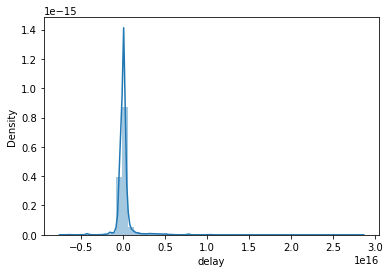

In [34]:
# distribution of the target column 
# right skewed distribution
# outliers present but not that significant   
sns.distplot(y_train)

<AxesSubplot:xlabel='total_open_amount'>

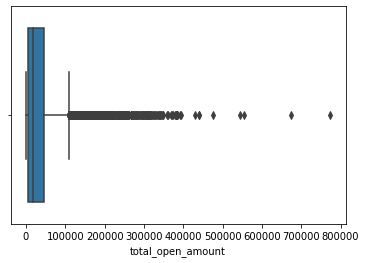

In [35]:
#plotting box plot to know outliers
sns.boxplot(main_train['total_open_amount'])

In [36]:
main_train['total_open_amount'].describe()

count     38265.000000
mean      32397.409076
std       39993.505078
min           4.090000
25%        4759.580000
50%       17448.290000
75%       47033.530000
max      773749.440000
Name: total_open_amount, dtype: float64

# Fature Engg

In [37]:
X_train.dtypes

business_code                     object
cust_number                       object
name_customer                     object
clear_date                datetime64[ns]
buisness_year                      int64
doc_id                             int64
posting_date              datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
document type                     object
total_open_amount                float64
cust_payment_terms                object
isOpen                             int64
dtype: object

In [38]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34438 entries, 0 to 34437
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           34438 non-null  object        
 1   cust_number             34438 non-null  object        
 2   name_customer           34438 non-null  object        
 3   clear_date              34438 non-null  datetime64[ns]
 4   buisness_year           34438 non-null  int64         
 5   doc_id                  34438 non-null  int64         
 6   posting_date            34438 non-null  datetime64[ns]
 7   document_create_date.1  34438 non-null  datetime64[ns]
 8   due_in_date             34438 non-null  datetime64[ns]
 9   invoice_currency        34438 non-null  object        
 10  document type           34438 non-null  object        
 11  total_open_amount       34438 non-null  float64       
 12  cust_payment_terms      34438 non-null  object

In [39]:
from sklearn.preprocessing import LabelEncoder
business_code_encoder = LabelEncoder()
business_code_encoder.fit(X_train['business_code'])
X_train['business_code_enc'] = business_code_encoder.transform(X_train['business_code'])
X_val['business_code_enc'] = business_code_encoder.transform(X_val['business_code'])
X_test['business_code_enc'] = business_code_encoder.transform(X_test['business_code'])

In [40]:
X_train

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,cust_payment_terms,isOpen,business_code_enc
0,U001,0200769623,WAL-MAR in,2019-01-11,2019,1928542955,2018-12-30,2018-12-30,2019-01-14,USD,RV,35229.19,NAH4,0,1
1,U001,0200769623,WAL-MAR corp,2019-01-09,2019,1928542106,2018-12-30,2018-12-30,2019-01-14,USD,RV,8286.44,NAH4,0,1
2,U001,0200799538,UNITE llc,2019-01-15,2019,1928543477,2018-12-30,2018-12-30,2019-01-14,USD,RV,97366.37,NAA8,0,1
3,U001,0200759878,SA us,2019-01-15,2019,1928540733,2018-12-30,2018-12-30,2019-01-14,USD,RV,16035.11,NAH4,0,1
4,U001,0200472708,WEST P corp,2019-01-11,2019,1928532775,2018-12-30,2018-12-30,2019-01-09,USD,RV,23293.12,NA10,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34433,U001,0200769623,WAL-MAR systems,2020-01-24,2020,1930392343,2020-01-14,2020-01-14,2020-01-29,USD,RV,9690.20,NAH4,0,1
34434,U001,0200769623,WAL-MAR co,2020-01-24,2020,1930397214,2020-01-14,2020-01-14,2020-01-29,USD,RV,629.67,NAH4,0,1
34435,U013,0140103699,L&E IN in,2020-02-12,2020,1991837377,2020-01-14,2020-01-14,2020-02-13,USD,RV,43962.32,NAVE,0,5
34436,U001,0200881076,ALBERT,2020-01-29,2020,1930379516,2020-01-14,2020-01-14,2020-01-29,USD,RV,18364.55,NAA8,0,1


In [41]:
y_train

0       -3 days
1       -5 days
2        1 days
3        1 days
4        2 days
          ...  
34433   -5 days
34434   -5 days
34435   -1 days
34436    0 days
34437    7 days
Name: delay, Length: 34438, dtype: timedelta64[ns]

In [42]:
X_train.drop(['business_code'], axis =1,inplace=True)
X_val.drop(['business_code'],axis=1 , inplace=True)
X_test.drop(['business_code'],axis=1 , inplace=True)

X_train.drop(['invoice_currency'], axis =1,inplace=True)
X_val.drop(['invoice_currency'],axis=1 , inplace=True)
X_test.drop(['invoice_currency'],axis=1 , inplace=True)

X_train.drop(['document type'], axis =1,inplace=True)
X_val.drop(['document type'],axis=1 , inplace=True)
X_test.drop(['document type'],axis=1 , inplace=True)

In [43]:
# day,month,year,week seperated from clear_date in X_Train,X_Val,X_Test

X_train['day_of_clear_date'] = X_train['clear_date'].dt.day
X_train['month_of_clear_date'] = X_train['clear_date'].dt.month
X_train['year_of_clear_date'] = X_train['clear_date'].dt.year


X_val['day_of_clear_date'] = X_val['clear_date'].dt.day
X_val['month_of_clear_date'] = X_val['clear_date'].dt.month
X_val['year_of_clear_date'] = X_val['clear_date'].dt.year


X_test['day_of_clear_date'] = X_test['clear_date'].dt.day
X_test['month_of_clear_date'] = X_test['clear_date'].dt.month
X_test['year_of_clear_date'] = X_test['clear_date'].dt.year



# day,month,year,week seperated from due_in_date in X_Train,X_Val,X_Test

X_train['day_of_due_in_date'] = X_train['due_in_date'].dt.day
X_train['month_of_due_in_date'] = X_train['due_in_date'].dt.month
X_train['year_of_due_in_date'] = X_train['due_in_date'].dt.year


X_val['day_of_due_in_date'] = X_val['due_in_date'].dt.day
X_val['month_of_due_in_date'] = X_val['due_in_date'].dt.month
X_val['year_of_due_in_date'] = X_val['due_in_date'].dt.year


X_test['day_of_due_in_date'] = X_test['due_in_date'].dt.day
X_test['month_of_due_in_date'] = X_test['due_in_date'].dt.month
X_test['year_of_due_in_date'] = X_test['due_in_date'].dt.year


# day,month,year,week seperated from document_create_date in X_Train,X_Val,X_Test

X_train['day_of_document_create_date'] = X_train['document_create_date.1'].dt.day
X_train['month_of_document_create_date'] = X_train['document_create_date.1'].dt.month
X_train['year_of_document_create_date'] = X_train['document_create_date.1'].dt.year


X_val['day_of_document_create_date'] = X_val['document_create_date.1'].dt.day
X_val['month_of_document_create_date'] = X_val['document_create_date.1'].dt.month
X_val['year_of_document_create_date'] = X_val['document_create_date.1'].dt.year


X_test['day_of_document_create_date'] = X_test['document_create_date.1'].dt.day
X_test['month_of_document_create_date'] = X_test['document_create_date.1'].dt.month
X_test['year_of_document_create_date'] = X_test['document_create_date.1'].dt.year



In [44]:
X_train.dtypes

cust_number                              object
name_customer                            object
clear_date                       datetime64[ns]
buisness_year                             int64
doc_id                                    int64
posting_date                     datetime64[ns]
document_create_date.1           datetime64[ns]
due_in_date                      datetime64[ns]
total_open_amount                       float64
cust_payment_terms                       object
isOpen                                    int64
business_code_enc                         int32
day_of_clear_date                         int64
month_of_clear_date                       int64
year_of_clear_date                        int64
day_of_due_in_date                        int64
month_of_due_in_date                      int64
year_of_due_in_date                       int64
day_of_document_create_date               int64
month_of_document_create_date             int64
year_of_document_create_date            

# Feature Selection

In [45]:
def drop_columns(columns ,traindf = X_train,valdf = X_val,testdf = X_test):
    traindf.drop(columns, axis =1,inplace=True)
    valdf.drop(columns,axis=1 , inplace=True)
    testdf.drop(columns,axis=1 , inplace=True)
    return traindf,valdf ,testdf

In [46]:
X_Train,X_Val,X_Test=drop_columns(['name_customer','cust_number','cust_payment_terms','clear_date','posting_date','document_create_date.1','due_in_date'])

In [47]:
X_train.dtypes

buisness_year                      int64
doc_id                             int64
total_open_amount                float64
isOpen                             int64
business_code_enc                  int32
day_of_clear_date                  int64
month_of_clear_date                int64
year_of_clear_date                 int64
day_of_due_in_date                 int64
month_of_due_in_date               int64
year_of_due_in_date                int64
day_of_document_create_date        int64
month_of_document_create_date      int64
year_of_document_create_date       int64
dtype: object

In [48]:
y_train

0       -3 days
1       -5 days
2        1 days
3        1 days
4        2 days
          ...  
34433   -5 days
34434   -5 days
34435   -1 days
34436    0 days
34437    7 days
Name: delay, Length: 34438, dtype: timedelta64[ns]

In [49]:
y_train=pd.DataFrame(y_train)
y_val=pd.DataFrame(y_val)
y_test=pd.DataFrame(y_test)

In [50]:
y_train['delay']=y_train['delay'].dt.days
y_val['delay']=y_val['delay'].dt.days
y_test['delay']=y_test['delay'].dt.days

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

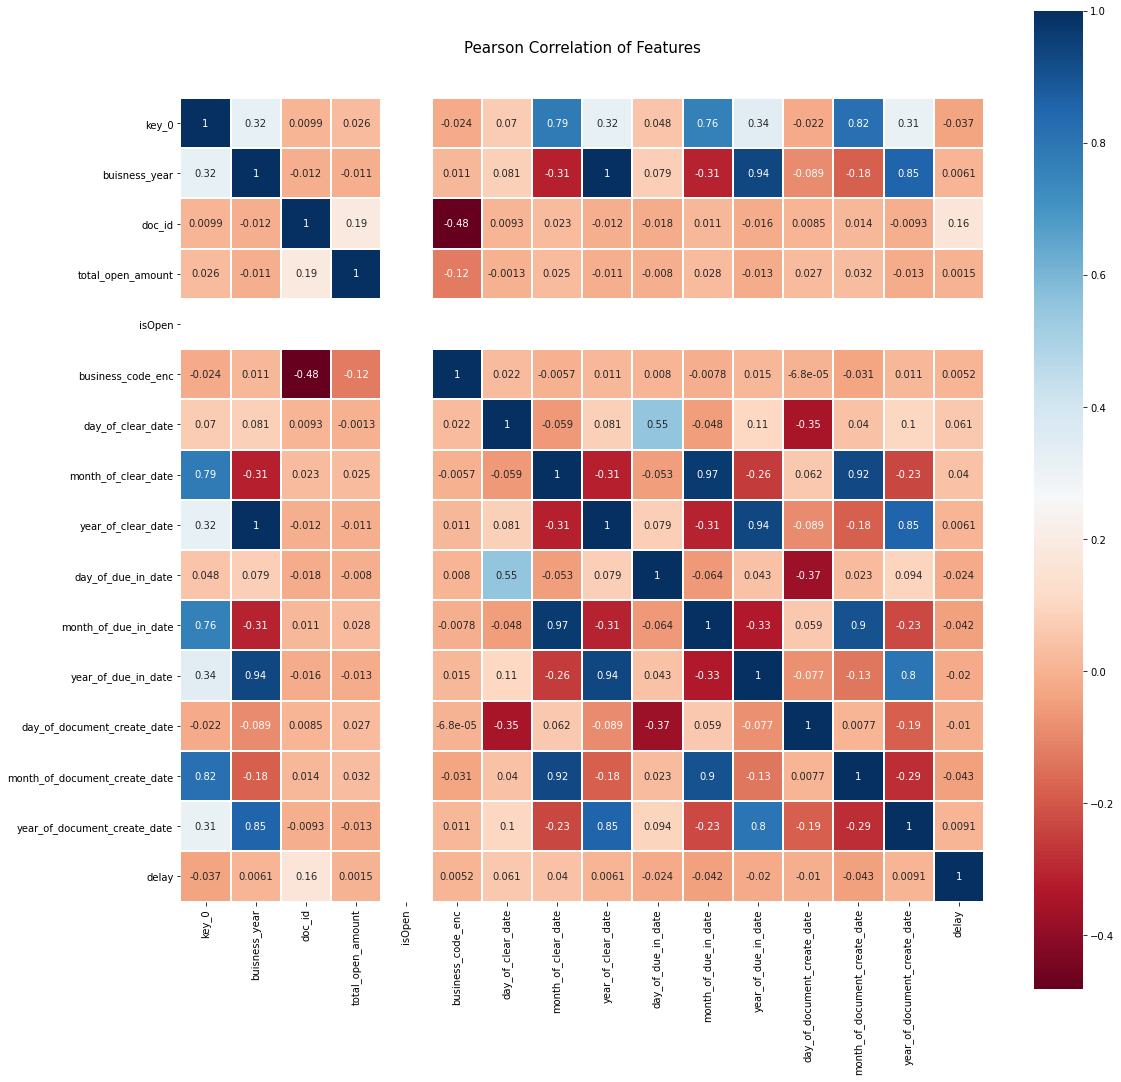

In [51]:
#Heat map
colormap = plt.cm.RdBu
plt.figure(figsize=(18,18))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [52]:
#by heatmap similar values are droped
X_train.drop(['isOpen'], axis =1,inplace=True)
X_val.drop(['isOpen'],axis=1 , inplace=True)
X_test.drop(['isOpen'],axis=1 , inplace=True)

X_train.drop(['buisness_year'], axis =1,inplace=True)
X_val.drop(['buisness_year'],axis=1 , inplace=True)
X_test.drop(['buisness_year'],axis=1 , inplace=True)

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

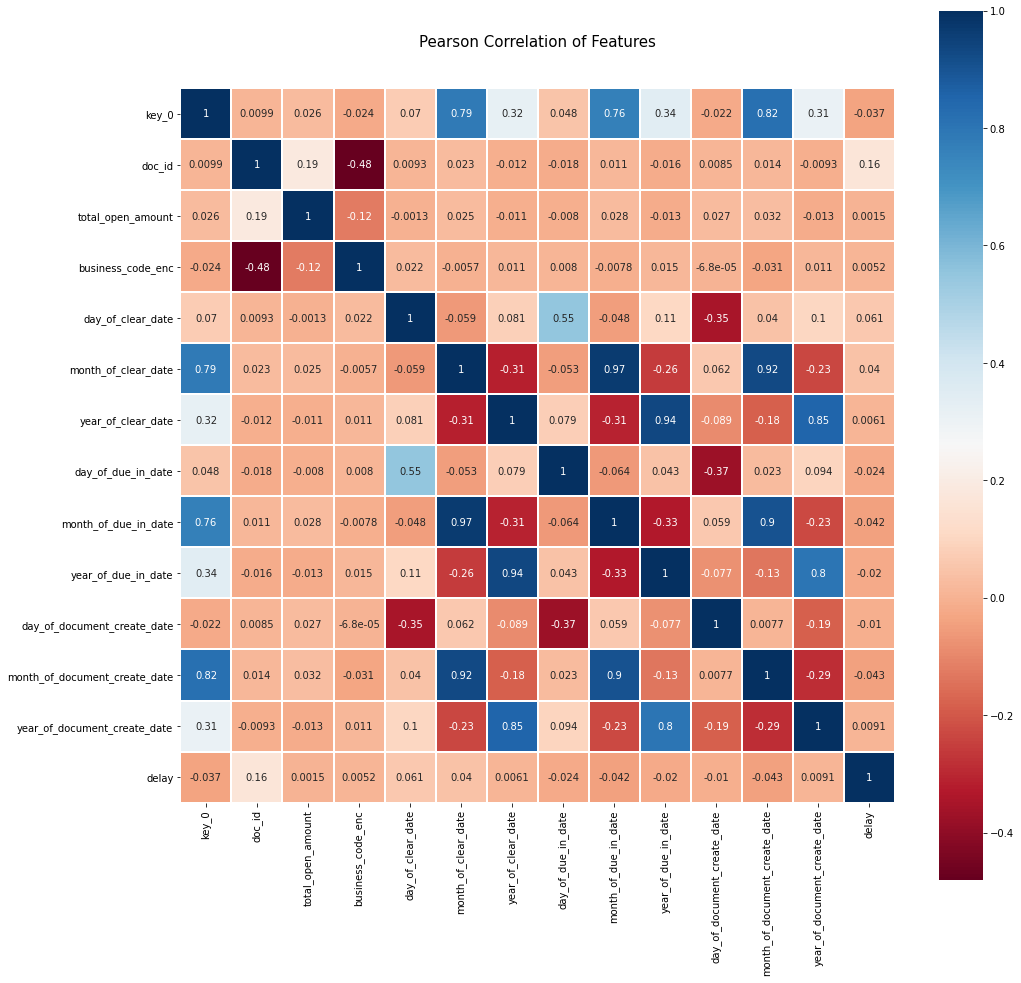

In [53]:
colormap = plt.cm.RdBu
plt.figure(figsize=(16,16))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [54]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34438 entries, 0 to 34437
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   doc_id                         34438 non-null  int64  
 1   total_open_amount              34438 non-null  float64
 2   business_code_enc              34438 non-null  int32  
 3   day_of_clear_date              34438 non-null  int64  
 4   month_of_clear_date            34438 non-null  int64  
 5   year_of_clear_date             34438 non-null  int64  
 6   day_of_due_in_date             34438 non-null  int64  
 7   month_of_due_in_date           34438 non-null  int64  
 8   year_of_due_in_date            34438 non-null  int64  
 9   day_of_document_create_date    34438 non-null  int64  
 10  month_of_document_create_date  34438 non-null  int64  
 11  year_of_document_create_date   34438 non-null  int64  
dtypes: float64(1), int32(1), int64(10)
memory usag

In [92]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(0.8)
sel.fit(X_train)

VarianceThreshold(threshold=0.8)

In [93]:
sel.variances_

array([8.66552225e+16, 1.62127374e+09, 3.07791889e-01, 7.93907379e+01,
       1.16001048e+01, 3.46833042e-02, 7.57309466e+01, 1.16263191e+01,
       3.90676254e-02, 7.70527028e+01, 1.15448271e+01, 3.25482245e-02])

# Modeling

In [56]:
#base model

from sklearn.linear_model import LinearRegression
base_model = LinearRegression()
base_model.fit(X_train, y_train)

LinearRegression()

In [76]:
y_predict = pd.DataFrame(base_model.predict(X_val))

In [97]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_val, y_predict, squared=True)

0.5302464525765497

In [77]:
y_predict

,0
0,1.004978
1,-0.987421
2,-1.992051
3,-4.990458
4,2.003819
...,...
2673,3.004764
2674,3.417729
2675,-3.988110
2676,43.375364


In [78]:
from sklearn.metrics import r2_score
score=r2_score(y_val,y_predict)*100
score

99.87418023279719

In [79]:
from sklearn.metrics import accuracy_score
y_predict=y_predict.astype(int)
accuracy_score(y_val, y_predict)*100

46.97535474234503

In [104]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_val, y_predict,squared=False))

0.853334772278705

In [83]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0 , max_depth=5)

In [84]:
regressor.fit(X_train, y_train)
y_predict2 = regressor.predict(X_val)

In [85]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_val, y_predict2))

8.651133106883337

In [86]:
from sklearn.metrics import r2_score
score=r2_score(y_val,y_predict2)*100
score

21.46275841729888

In [100]:
#Decision Tree model
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(max_depth=5)
regressor.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5)

In [101]:
y_tree_predict=regressor.predict(X_val)

In [102]:
tree_model=pd.DataFrame(zip(y_val,y_tree_predict),columns=['Actual','Tree_Predicted'])

In [103]:
(abs(tree_model.Tree_Predicted-tree_model.Actual)/tree_model.Actual).mean()

TypeError: unsupported operand type(s) for -: 'float' and 'str'

In [105]:
mean_squared_error(y_val,y_tree_predict,squared=False)

8.651133106883337

In [106]:
pd.set_option("display.max_rows", 500, "display.max_columns", 20)

In [108]:
tree_model.head(5)

,Actual,Tree_Predicted
0,delay,-0.512478


In [109]:
tree_model['Tree_Predicted'].astype(int)

0    0
Name: Tree_Predicted, dtype: int32

In [ ]:
tree_model.head()